In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


# PCA

In [3]:
## DATASET ##
df = pd.read_csv()
columns = df.columns
columns = [i.replace(" ", "_") for i in columns]
df.columns = columns
nano_list.append("Diagnosis_simplified")
df_top = df[nano_list].dropna()


Variances (Percentage):
[2.05821476e+01 1.62208235e+01 8.83703781e+00 7.44468834e+00
 4.56253424e+00 3.41292140e+00 2.55075831e+00 2.37859228e+00
 2.11751925e+00 1.85862101e+00 1.60873886e+00 1.50585826e+00
 1.39578897e+00 1.27835204e+00 1.19199062e+00 1.11498262e+00
 1.07177122e+00 1.03561654e+00 9.43391494e-01 8.87894006e-01
 8.30911464e-01 8.08099664e-01 7.54418983e-01 6.62826924e-01
 6.52990494e-01 6.09937427e-01 5.94677137e-01 5.83334045e-01
 5.57240220e-01 5.32927897e-01 5.01902182e-01 4.76387110e-01
 4.63885636e-01 4.46394880e-01 4.36042582e-01 4.06798386e-01
 4.01269084e-01 3.78492960e-01 3.56798125e-01 3.47542707e-01
 3.29558304e-01 3.14661260e-01 2.97077459e-01 2.88700604e-01
 2.82976365e-01 2.80668529e-01 2.66312773e-01 2.58380944e-01
 2.39924523e-01 2.34047940e-01 2.22700291e-01 2.08774217e-01
 2.06205427e-01 1.92478625e-01 1.85252532e-01 1.76219934e-01
 1.71198840e-01 1.63685824e-01 1.53729189e-01 1.49905134e-01
 1.42532718e-01 1.38718035e-01 1.33883701e-01 1.27767140e-01


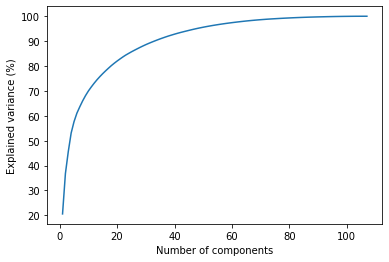

In [6]:
y = df_top["Diagnosis_simplified"]
X = df_top.drop("Diagnosis_simplified", axis=1)

# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

components = None
pca = PCA(n_components = components)# perform PCA on the scaled data
pca.fit(X_scaled)

# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()


# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')# Make the scree plot


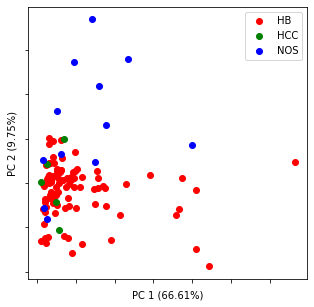

In [11]:
nano_list.extend(("Diagnosis_simplified", "BSC_ID"))
df_top = df[nano_list].dropna()
y = df_top["Diagnosis_simplified"]
X = df_top.drop(["Diagnosis_simplified", "BSC_ID"], axis=1)
X = np.array(X)
y = np.array(y)
X = np.array(X)
y = np.array(y)
names    = df_top["BSC_ID"].tolist()
features = np.array(list((Counter(y).keys())))
#labels =  ["HCC", "NOS", "HB"]
labels = sorted(list((Counter(y).keys())))
#PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#Plot PCA 

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
for i, c, label in zip(features, 'rgbcmykw', labels):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label)
    


    # Add the axis labels
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

    
plt.legend()
plt.show()
#plt.savefig("PCA_without_Ids.jpg")

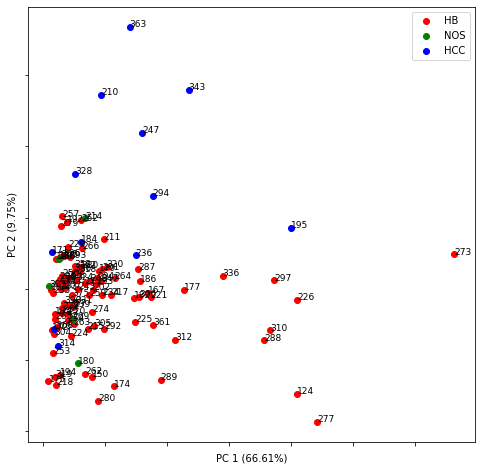

In [14]:
#### PCA with BSC IDs ####
df_top = df[nano_list].dropna()
y = df_top["Diagnosis_simplified"]
X = df_top.drop(["Diagnosis_simplified", "BSC_ID"], axis=1)
X = np.array(X)
y = np.array(y)
names    = df_top["BSC_ID"].tolist()
features = np.array(list((Counter(y).keys())))

#PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#Plot PCA 
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
for i, c, label in zip(features, 'rgbcmykw', features):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label)
    
# Add the labels
for name in names:

    # Get the index of the name
    i = names.index(name)
    
    # Add the text label
    labelpad = 0.01   # Adjust this based on your dataset
    plt.text(X_pca[i,0]+labelpad, X_pca[i,1]+labelpad, name, fontsize=9)

    # Add the axis labels
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

    
plt.legend()
plt.show()



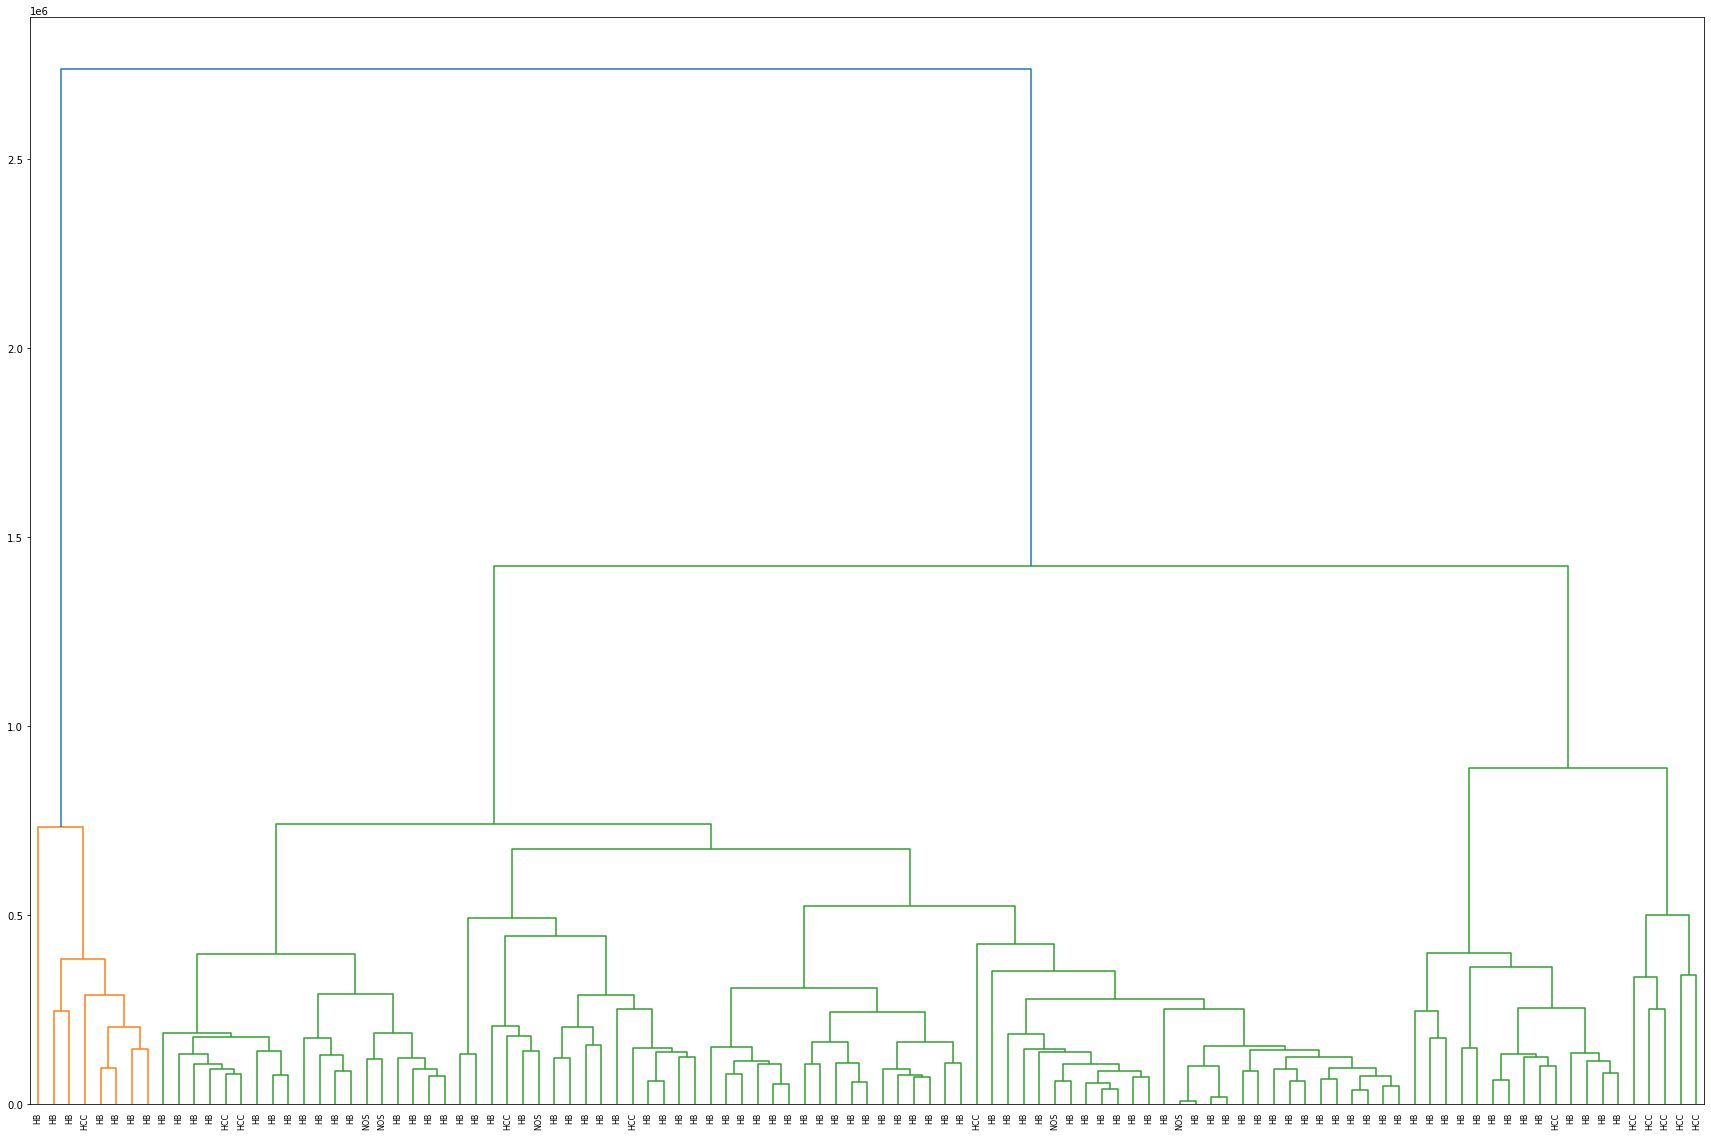

In [17]:
### DENDROGRAM

plt.figure(figsize=(30, 20))

df_top = df[nano_list].dropna()
y = df_top["Diagnosis_simplified"]
X = df_top.drop("Diagnosis_simplified", axis=1)
X = np.array(X)
y = np.array(y)
# Calculate the distance between each sample
Z = linkage(X, 'ward')
 
# Plot with Custom leaves
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=y)

# Show the graph
plt.show()